<a href="https://colab.research.google.com/github/anu-mohan/Ds_pythoncode/blob/main/SVM_Salary_data_Anisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Prepare a classification model using SVM for salary data

Data Description:

age -- age of a person workclass -- A work class is a grouping of work education -- Education of an individuals
maritalstatus -- Marital status of an individulas
occupation -- occupation of an individuals relationship --
race -- Race of an Individual sex -- Gender of an Individual capitalgain -- profit received from the sale of an investment
capitalloss -- A decrease in the value of a capital asset hoursperweek -- number of hours work per week
native -- Native of an individual Salary -- salary of an individual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
train= pd.read_csv("SalaryData_Train(1).csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test=pd.read_csv("SalaryData_Test(1).csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
train.shape

(30161, 14)

In [5]:
test.shape

(15060, 14)

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train["workclass"] = label_encoder.fit_transform(train["workclass"])
train["education"] = label_encoder.fit_transform(train["education"])
train["maritalstatus"] = label_encoder.fit_transform(train["maritalstatus"])
train["occupation"] = label_encoder.fit_transform(train["occupation"])
train["relationship"] = label_encoder.fit_transform(train["relationship"])
train["race"] = label_encoder.fit_transform(train["race"])
train["sex"] = label_encoder.fit_transform(train["sex"])
train["native"] = label_encoder.fit_transform(train["native"])
train["Salary"] = label_encoder.fit_transform(train["Salary"])

In [7]:
test["workclass"] = label_encoder.fit_transform(test["workclass"])
test["education"] = label_encoder.fit_transform(test["education"])
test["maritalstatus"] = label_encoder.fit_transform(test["maritalstatus"])
test["occupation"] = label_encoder.fit_transform(test["occupation"])
test["relationship"] = label_encoder.fit_transform(test["relationship"])
test["race"] = label_encoder.fit_transform(test["race"])
test["sex"] = label_encoder.fit_transform(test["sex"])
test["native"] = label_encoder.fit_transform(test["native"])
test["Salary"] = label_encoder.fit_transform(test["Salary"])

In [8]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [9]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


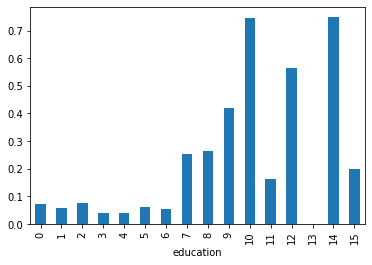

In [10]:
train.groupby('education').Salary.mean().plot(kind='bar')

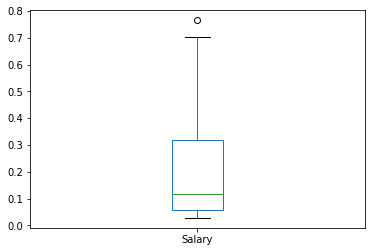

In [11]:
test.groupby('education').Salary.mean().plot(kind='box')

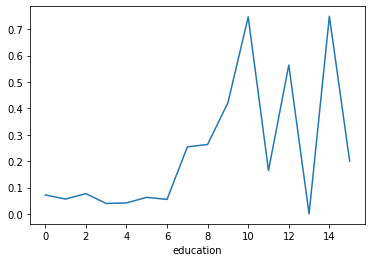

In [12]:
train.groupby('education').Salary.mean().plot(kind='line')

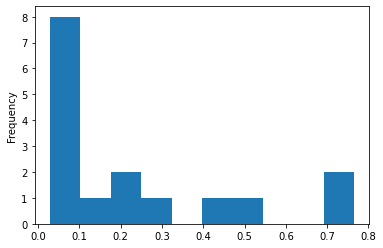

In [13]:
test.groupby('education').Salary.mean().plot(kind='hist')

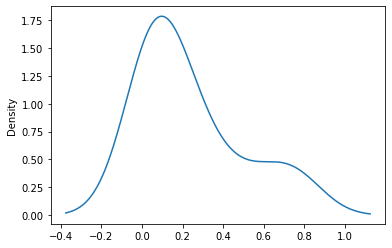

In [14]:
train.groupby('education').Salary.mean().plot(kind='density')

In [15]:
X_train=train.iloc[:,:-1]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [16]:
y_train=train.iloc[:,-1]
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int64

In [17]:
X_test=test.iloc[:,:-1]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [18]:
y_test=test.iloc[:,-1]
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int64

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30161, 13), (30161,), (15060, 13), (15060,))

In [20]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[5],'C':[15] }]
gsv = GridSearchCV(clf,param_grid,cv=3)
gsv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [15], 'gamma': [5], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 5, 'kernel': 'rbf'}, 0.7557110104062025)

In [22]:
clf = SVC(C= 15, gamma = 5)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 76.22177954847278


array([[11142,   218],
       [ 3363,   337]])

In [23]:
salary = pd.merge(train,test)

In [24]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,2,11,9,0,5,1,4,1,0,0,40,37,0
1,19,2,11,9,4,2,3,4,1,0,0,40,37,0
2,19,2,11,9,4,2,3,4,1,0,0,40,37,0
3,19,2,11,9,4,2,3,4,1,0,0,40,37,0
4,19,2,11,9,4,2,3,4,1,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,61,2,5,4,2,2,0,4,1,0,0,40,37,0
5906,45,3,9,13,2,3,0,4,1,0,0,45,37,1
5907,32,2,15,10,4,3,3,4,1,0,0,40,37,0
5908,33,2,11,9,0,0,4,2,0,0,0,40,37,0


In [25]:
X=salary.iloc[:,:-1]
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,38,2,11,9,0,5,1,4,1,0,0,40,37
1,19,2,11,9,4,2,3,4,1,0,0,40,37
2,19,2,11,9,4,2,3,4,1,0,0,40,37
3,19,2,11,9,4,2,3,4,1,0,0,40,37
4,19,2,11,9,4,2,3,4,1,0,0,40,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,61,2,5,4,2,2,0,4,1,0,0,40,37
5906,45,3,9,13,2,3,0,4,1,0,0,45,37
5907,32,2,15,10,4,3,3,4,1,0,0,40,37
5908,33,2,11,9,0,0,4,2,0,0,0,40,37


In [26]:
y=salary.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
5905    0
5906    1
5907    0
5908    0
5909    0
Name: Salary, Length: 5910, dtype: int64

In [27]:
clf1 = SVC(C= 15, gamma = 50)
clf1.fit(X , y)
y_pred = clf1.predict(X)
acc1 = accuracy_score(y, y_pred) * 100
print("Accuracy =", acc1)
confusion_matrix(y, y_pred)

Accuracy = 94.87309644670052


array([[4845,   64],
       [ 239,  762]])